In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# K MEANS FOR K={2,3,4,5}

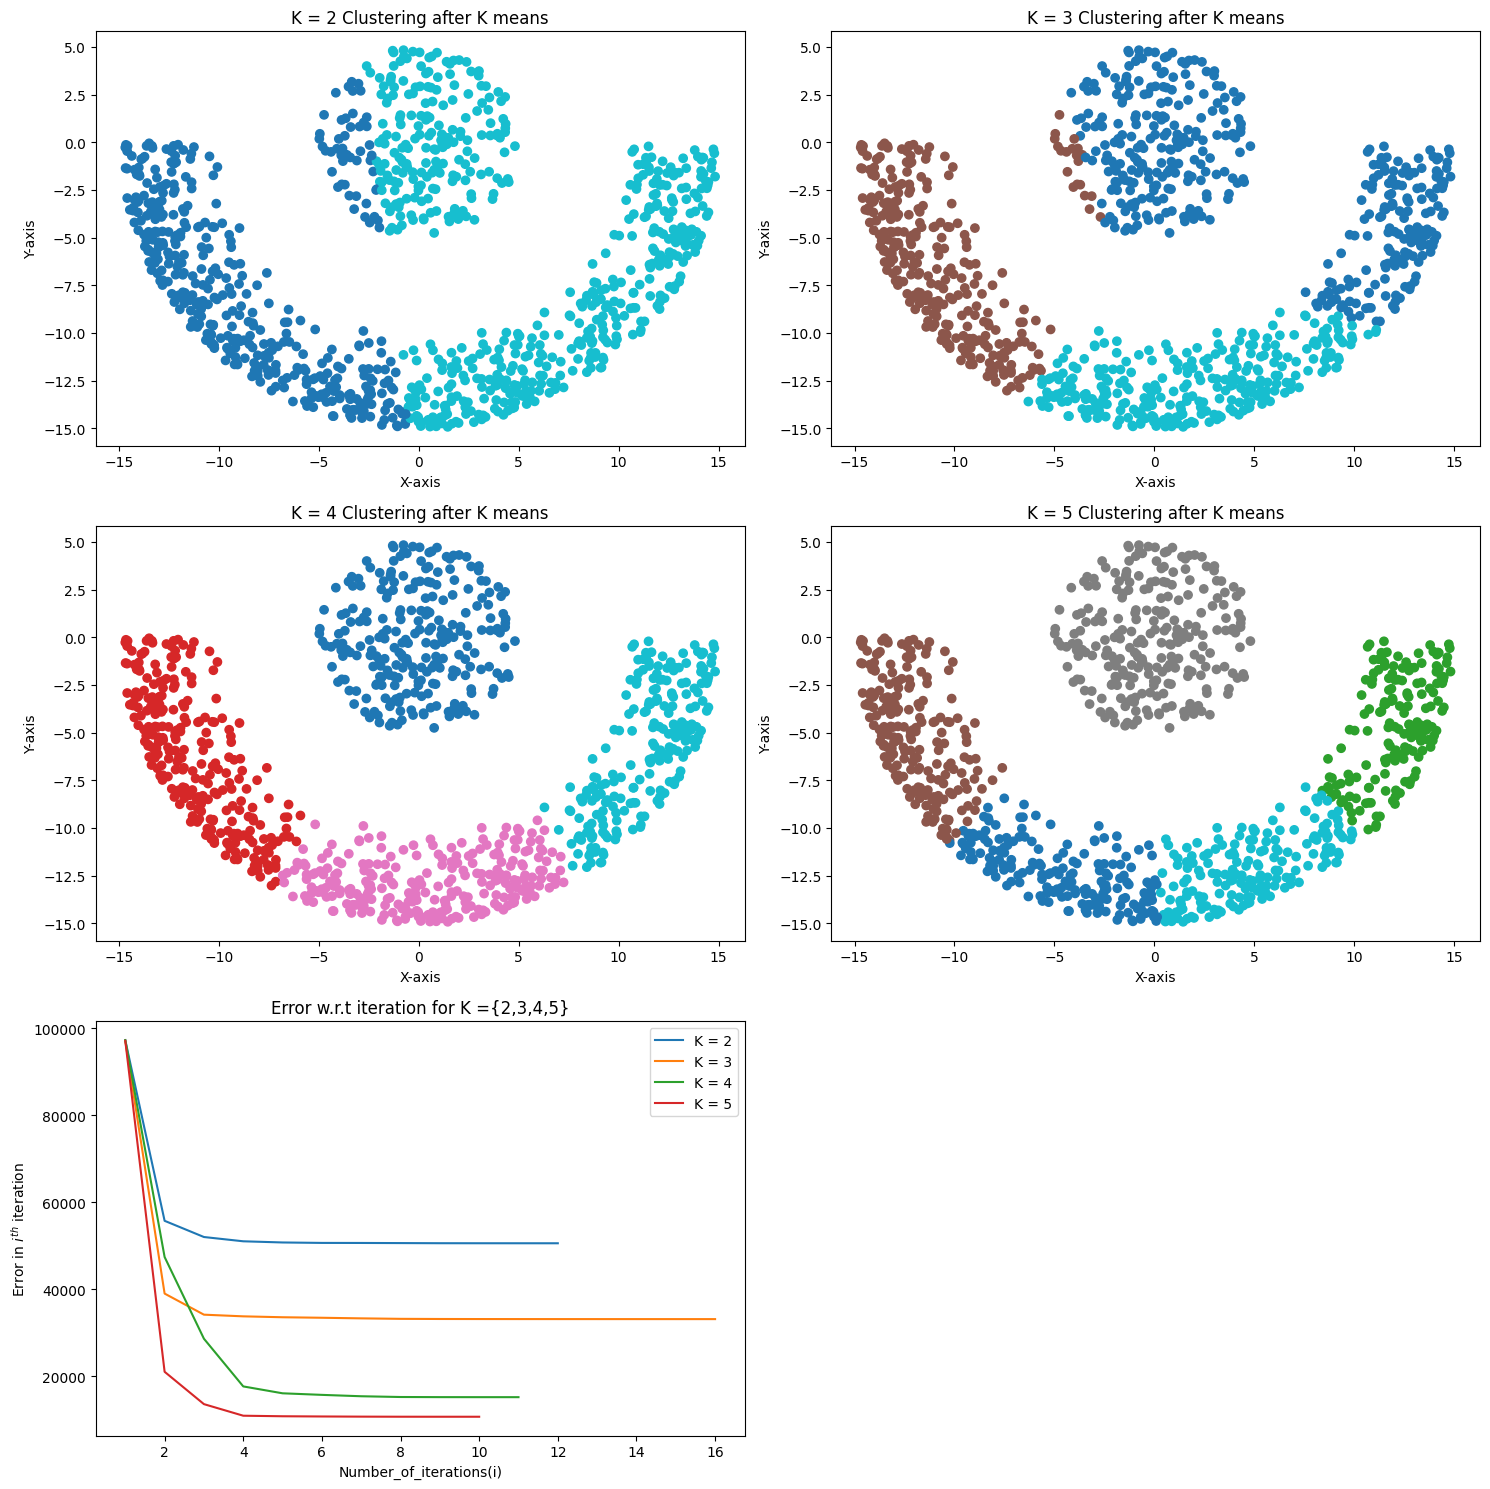

In [11]:
np.random.seed(99)
cluster=[2,3,4,5]
v=0
fig, axs = plt.subplots(3, 2,figsize=(15,15))
for num_of_clusters in cluster : 
  dataset = pd.read_csv("cm_dataset_2 - cm_dataset.csv",header=None)
  dataset=np.array(dataset)
  error_for_intialisations =[[] for i in range (5)]
  current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
  current_cluster_assignement=np.random.randint(0,num_of_clusters,dataset.shape[0])
  error_function=[]
  Next_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)

  

  mean_of_clusters=np.zeros((num_of_clusters,2))
  for i in range(num_of_clusters) :
     temp=0
     for j in range(dataset.shape[0]) :
          if current_cluster_assignement[j]==i :
            temp+=1
            mean_of_clusters[i]+=dataset[j]
     mean_of_clusters[i]/= temp    


  while True :

      error_temp =0

      for i in range(dataset.shape[0]) :
        t=current_cluster_assignement[i]

        error_temp+=((dataset[i][0]-mean_of_clusters[t][0])**2)+((dataset[i][1]-mean_of_clusters[t][1])**2)


        Next_cluster_assignement[i]=np.argmin([((dataset[i][0]-mean_of_clusters[j][0])**2)+((dataset[i][1]-mean_of_clusters[j][1])**2) for j in range(num_of_clusters)])

      error_function.append(error_temp)

      if  np.array_equal(Next_cluster_assignement,current_cluster_assignement):
        break
      
      current_cluster_assignement = Next_cluster_assignement.copy()
      mean_of_clusters=np.zeros((num_of_clusters,2))
      for i in range(num_of_clusters) :
          temp=0
          for j in range(dataset.shape[0]) :
              if current_cluster_assignement[j]==i :
                temp+=1
                mean_of_clusters[i]+=dataset[j]
          mean_of_clusters[i]/= temp
  colors =plt.cm.tab10(np.linspace(0,1,num_of_clusters))
  color_of_each_cluster=colors[current_cluster_assignement]
  axs[int(v/2),v%2].scatter(dataset[:,0],dataset[:,1],c=color_of_each_cluster)
  axs[int(v/2),v%2].set_xlabel("X-axis")
  axs[int(v/2),v%2].set_ylabel("Y-axis")
  axs[int(v/2),v%2].set_title("K = "+str(num_of_clusters)+" Clustering after K means")
  
  v+=1
  x=np.arange(len(error_function))+1
  axs[2,0].plot(x,error_function,label="K = "+str(num_of_clusters))
axs[2,0].set_title("Error w.r.t iteration for K ={2,3,4,5}")
axs[2,0].set_ylabel("Error in $i^{th}$ iteration")
axs[2,0].set_xlabel("Number_of_iterations(i)")
fig.delaxes(axs[2,1])
plt.tight_layout()
plt.legend()
plt.show()  